In [44]:
from scipy import stats
import numpy as np
import pandas as pd
from sklearn import model_selection, linear_model, ensemble
import seaborn as sns

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
df = pd.read_csv('diamonds.txt', sep='\t')

In [8]:
#Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    df.drop('price', axis=1), df['price'], test_size=0.25, random_state=1)

In [18]:
#Создаем и обучаем модели 
lnr = linear_model.LinearRegression().fit(X_train, y_train)
#Так как с изменилось значение n_estimators по умолчанию зафиксируем старое равное 10
rfr = ensemble.RandomForestRegressor(n_estimators=10, random_state=1).fit(X_train, y_train)

In [14]:
#Проверяем метрику на тестовой выборке
lnr.score(X_test, y_test)

0.8615514393114848

In [19]:
#Проверяем метрику на тестовой выборке
rfr.score(X_test, y_test)

0.872272716766677

In [31]:
#Расчитаем для каждой модели модули отклонений от истинных цен
lnr_predict = abs(lnr.predict(X_test) - y_test)
rfr_predict = abs(rfr.predict(X_test) - y_test)
'''
Посмотрим на Т-тест для взаимносвязанных величин, если р < alpha,
то гипотеза о том, что распределения имеют одинаковые параметры будет отвергнута
'''

stats.ttest_rel(lnr_predict, rfr_predict)

Ttest_relResult(statistic=13.01772978387856, pvalue=1.6551745751413995e-38)

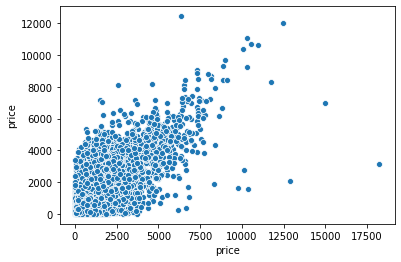

In [37]:
ax = sns.scatterplot(lnr_predict, rfr_predict)


In [49]:
from statsmodels.stats.weightstats import *
print(zconfint(lnr_predict))
print(zconfint(rfr_predict))

(870.7798132482995, 909.9729876088212)
(783.452927513767, 822.388107031056)


In [50]:
stats.ttest_ind(lnr_predict, rfr_predict, equal_var = False)

Ttest_indResult(statistic=6.205418446787019, pvalue=5.534495566294121e-10)

In [54]:
cm = CompareMeans(DescrStatsW(lnr_predict), DescrStatsW(rfr_predict))
print(cm.tconfint_diff())

(59.83194833382869, 115.079817978469)


In [55]:
DescrStatsW(lnr_predict - rfr_predict).tconfint_mean()

(74.28724532595444, 100.62452098634296)